# Inicialização

In [62]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import snscrape.modules.twitter as sntwitter
from tqdm import tqdm

# Oculta warnings do notebook
# import warnings
# warnings.filterwarnings('ignore')

# Configurações de visualização
pd.set_option('display.max_columns', 30)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Carregando dataset com os dados dos candidatos de SP nas eleições de 2022
dataset_path = 'datasets/'
cand_df = pd.read_csv(f"{dataset_path}consulta_cand_2022_SP.csv", sep=';')
print(cand_df.shape)
cand_df.info()

(3659, 71)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     3659 non-null   object 
 1   HH_GERACAO                     3659 non-null   object 
 2   ANO_ELEICAO                    3659 non-null   int64  
 3   CD_TIPO_ELEICAO                3659 non-null   int64  
 4   NM_TIPO_ELEICAO                3659 non-null   object 
 5   NR_TURNO                       3659 non-null   int64  
 6   CD_ELEICAO                     3659 non-null   int64  
 7   DS_ELEICAO                     3659 non-null   object 
 8   DT_ELEICAO                     3659 non-null   object 
 9   TP_ABRANGENCIA                 3659 non-null   object 
 10  SG_UF                          3659 non-null   object 
 11  SG_UE                          3659 non-null   object 
 12  NM_UE                          3659 n

In [3]:
# Carregando dataset com os dados de redes sociais dos candidatos de SP nas eleições de 2022
rs_df = pd.read_csv(f"{dataset_path}rede_social_candidato_2022_SP.csv", sep=';')
print(rs_df.shape)
rs_df.info()

(6735, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735 entries, 0 to 6734
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DT_GERACAO       6735 non-null   object
 1   HH_GERACAO       6735 non-null   object
 2   AA_ELEICAO       6735 non-null   int64 
 3   SG_UF            6735 non-null   object
 4   CD_TIPO_ELEICAO  6735 non-null   int64 
 5   NM_TIPO_ELEICAO  6735 non-null   object
 6   CD_ELEICAO       6735 non-null   int64 
 7   DS_ELEICAO       6735 non-null   object
 8   SQ_CANDIDATO     6735 non-null   int64 
 9   NR_ORDEM         6735 non-null   int64 
 10  DS_URL           6735 non-null   object
dtypes: int64(5), object(6)
memory usage: 578.9+ KB


In [4]:
rs_df[rs_df.DS_URL.str.contains('twitter', case=False)].shape

(624, 11)

In [5]:
# Filtrando somente candidatos com conta no Twitter
twitter_candidates = rs_df[rs_df.DS_URL.str.contains('twitter', case=False)]

In [6]:
# Juntando as duas bases
df = pd.merge(cand_df, twitter_candidates[['SQ_CANDIDATO', 'DS_URL']], on="SQ_CANDIDATO", how="left")
df.shape

(3682, 72)

# Checagem dos dados

In [17]:
# Filtrando deputados eleitos que possuam perfil no Twitter
elected_values = ['ELEITO POR QP', 'ELEITO POR MÉDIA', 'ELEITO']

est_df = df.loc[
    (df['DS_CARGO'] == 'DEPUTADO ESTADUAL') & 
    (df['DS_SIT_TOT_TURNO'].isin(elected_values)) & 
    (df['DS_URL'].notna())
]
print(est_df.shape)

(50, 72)


In [18]:
# Vamos checar os candidatos duplicados
print('Estaduais: \n')
print((est_df.SQ_CANDIDATO.value_counts() > 1).loc[lambda x: x == True].index)

Estaduais: 

Int64Index([250001611799], dtype='int64')


In [9]:
# Vamos checar as contas deste candidato
est_df[est_df.SQ_CANDIDATO == 250001611799]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NR_FEDERACAO,NM_FEDERACAO,SG_FEDERACAO,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS,DS_URL
885,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001611799,13114,ENIO FRANCISCO TATTO,ENIO TATTO,#NULO#,1075694850,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,FEDERAÇÃO,13,PT,PARTIDO DOS TRABALHADORES,2,Federação Brasil da Esperança - FE BRASIL,PT/PC do B/PV,PT/PC do B/PV,250001681589,FEDERAÇÃO,PT/PC do B/PV,1,BRASILEIRA NATA,RS,-3,FREDERICO WESTPHALEN,20/05/1960,62.00,115832150175,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,277,DEPUTADO,"1,270,629.01",2,ELEITO POR QP,S,S,-1,6016936920226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://twitter.com/depeniotatto
886,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001611799,13114,ENIO FRANCISCO TATTO,ENIO TATTO,#NULO#,1075694850,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,FEDERAÇÃO,13,PT,PARTIDO DOS TRABALHADORES,2,Federação Brasil da Esperança - FE BRASIL,PT/PC do B/PV,PT/PC do B/PV,250001681589,FEDERAÇÃO,PT/PC do B/PV,1,BRASILEIRA NATA,RS,-3,FREDERICO WESTPHALEN,20/05/1960,62.00,115832150175,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,277,DEPUTADO,"1,270,629.01",2,ELEITO POR QP,S,S,-1,6016936920226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://www.twitter.com/eniotatto13114


In [10]:
# Testando os links, percebe-se que o segundo não existe mais, portanto podemos remover esta linha
est_df = est_df.drop([886])

# Exploração dos dados

### Diversidade

In [21]:
print('Deputados Estaduais eleitos, com conta no Twitter:\n')
print(est_df.DS_GENERO.value_counts())
print()
print(est_df.DS_COR_RACA.value_counts())

Deputados Estaduais eleitos, com conta no Twitter:

MASCULINO    34
FEMININO     16
Name: DS_GENERO, dtype: int64

BRANCA    43
PRETA      5
PARDA      2
Name: DS_COR_RACA, dtype: int64


<AxesSubplot: xlabel='DS_COR_RACA', ylabel='Count'>

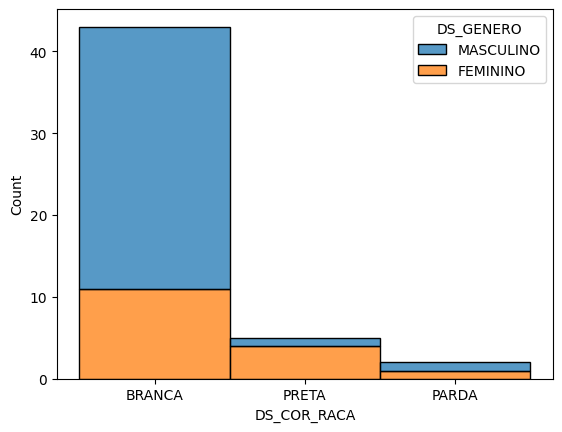

In [20]:
sns.histplot(
    data=est_df,
    hue='DS_GENERO',
    x='DS_COR_RACA',
    multiple='stack',
)

### Extração de dados das contas Twitter

In [58]:
# Vamos listar as contas no twitter dos deputados estaduais eleitos
est_df.DS_URL

22                          https://www.twitter/dreltonjr
232              https://twitter.com/EdianeMariaMTST?s=09
276     https://twitter.com/fabibbolsonaro?s=21&t=yq90...
318                      https://twitter.com/delegadoolim
367     https://www.twitter.com/https://twitter.com/le...
391     https://twitter.com/bethsahao?ref_src=twsrc%5E...
427                          https://twitter.com/sppretas
458                    https://www.twitter.com/tomeabduch
459                     https://twitter.com/prcarloscezar
490                        https://twitter.com/majormecca
514                      https://twitter.com/valbolsonaro
560                      https://twitter.com/zimbaldirafa
599                    https://twitter.com/CarlosGiannazi
660              https://twitter.com/tenente_coimbra?s=11
690                   https://twitter.com/rafaelsaraivasp
741                    https://twitter.com/BrunoZambelli3
742                      https://twitter.com/LFTeixeira13
810           

In [37]:
# Como precisamos somente do username, precisamos aplicar uma função
def get_twitter_username(link):
    link = link.rstrip('/')
    username = link.split('/')[-1]
    username = username.split('?')[0]
    return username.lower()

est_df['TW_USER'] = est_df.DS_URL.apply(get_twitter_username)
est_df['TW_USER'].describe()

/tmp/ipykernel_1329/1609114888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est_df['TW_USER'] = est_df.DS_URL.apply(get_twitter_username)


count            50
unique           50
top       dreltonjr
freq              1
Name: TW_USER, dtype: object

In [46]:
usernames = list(est_df['TW_USER'])

user_data = {}
for i, username in enumerate(usernames):
    try:
        last_tweet = next(sntwitter.TwitterProfileScraper(username).get_items())
        user_data[username] = {
            'followersCount': last_tweet.user.followersCount,
            'friendsCount': last_tweet.user.friendsCount,
            'statusesCount': last_tweet.user.statusesCount,
            'favouritesCount': last_tweet.user.favouritesCount,
            'listedCount': last_tweet.user.listedCount,
            'mediaCount': last_tweet.user.mediaCount,
        }
        print(f'{i}/{len(usernames)} {username}: {user_data[username]}')
    except Exception as e:
        print(f'{i}/{len(usernames)} {username}: Erro')
        user_data[username] = {
            'followersCount': 0,
            'friendsCount': 0,
            'statusesCount': 0,
            'favouritesCount': 0,
            'listedCount': 0,
            'mediaCount': 0,
        }

0/50 dreltonjr: {'followersCount': 866, 'friendsCount': 461, 'statusesCount': 742, 'favouritesCount': 301, 'listedCount': 1, 'mediaCount': 480}
1/50 EdianeMariaMTST: {'followersCount': 14318, 'friendsCount': 242, 'statusesCount': 3466, 'favouritesCount': 3103, 'listedCount': 40, 'mediaCount': 517}
2/50 fabibbolsonaro: {'followersCount': 15533, 'friendsCount': 7072, 'statusesCount': 91, 'favouritesCount': 498, 'listedCount': 3, 'mediaCount': 35}
3/50 delegadoolim: {'followersCount': 2927, 'friendsCount': 0, 'statusesCount': 1923, 'favouritesCount': 233, 'listedCount': 37, 'mediaCount': 464}
4/50 leosiqueirabr: {'followersCount': 54150, 'friendsCount': 1077, 'statusesCount': 8630, 'favouritesCount': 4836, 'listedCount': 343, 'mediaCount': 912}
5/50 bethsahao: {'followersCount': 2742, 'friendsCount': 1578, 'statusesCount': 9671, 'favouritesCount': 3870, 'listedCount': 69, 'mediaCount': 545}
6/50 sppretas: {'followersCount': 1782, 'friendsCount': 18, 'statusesCount': 277, 'favouritesCount'

In [56]:
# Agora vamos adicionar os dados dos usuários no mesmo dataframe
est_df['TW_followersCount'] = est_df.TW_USER.apply(lambda x: user_data[x]['followersCount'])
est_df['TW_friendsCount'] = est_df.TW_USER.apply(lambda x: user_data[x]['friendsCount'])
est_df['TW_statusesCount'] = est_df.TW_USER.apply(lambda x: user_data[x]['statusesCount'])
est_df['TW_favouritesCount'] = est_df.TW_USER.apply(lambda x: user_data[x]['favouritesCount'])
est_df['TW_listedCount'] = est_df.TW_USER.apply(lambda x: user_data[x]['listedCount'])
est_df['TW_mediaCount'] = est_df.TW_USER.apply(lambda x: user_data[x]['mediaCount'])

est_df.head()

/tmp/ipykernel_1329/624536729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est_df['TW_followersCount'] = est_df.TW_USER.apply(lambda x: user_data[x]['followersCount'])
/tmp/ipykernel_1329/624536729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est_df['TW_friendsCount'] = est_df.TW_USER.apply(lambda x: user_data[x]['friendsCount'])
/tmp/ipykernel_1329/624536729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NR_FEDERACAO,NM_FEDERACAO,SG_FEDERACAO,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS,DS_URL,TW_USER,TW_followersCount,TW_friendsCount,TW_statusesCount,TW_favouritesCount,TW_listedCount,TW_mediaCount
22,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001643810,20012,ELTON ALVES RIBEIRO DE CARVALHO JUNIOR,DR. ELTON,#NULO#,18563639889,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,20,PSC,PARTIDO SOCIAL CRISTÃO,-1,#NULO#,#NULO#,#NULO#,250001683088,PARTIDO ISOLADO,PSC,1,BRASILEIRA NATA,SP,-3,SÃO JOSÉ DOS CAMPOS,08/07/1974,48.00,239940780141,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,111,MÉDICO,"1,270,629.01",2,ELEITO POR QP,N,S,-1,6032291820226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://www.twitter/dreltonjr,dreltonjr,866,461,742,301,1,480
232,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001619350,50110,EDIANE MARIA DO NASCIMENTO,EDIANE MARIA,#NULO#,36565859892,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,FEDERAÇÃO,50,PSOL,PARTIDO SOCIALISMO E LIBERDADE,3,Federação PSOL REDE,PSOL/REDE,PSOL/REDE,250001682175,FEDERAÇÃO,PSOL/REDE,1,BRASILEIRA NATA,PE,-3,FLORESTA,10/10/1983,39.00,58740250825,4,FEMININO,2,LÊ E ESCREVE,1,SOLTEIRO(A),2,PRETA,598,EMPREGADO DOMÉSTICO,"1,270,629.01",2,ELEITO POR QP,N,S,-1,6022522620226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://twitter.com/EdianeMariaMTST?s=09,EdianeMariaMTST,14318,242,3466,3103,40,517
276,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001610130,22051,FABIANA DE LIMA BARROSO,FABIANA B.,#NULO#,41459315804,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,22,PL,PARTIDO LIBERAL,-1,#NULO#,#NULO#,#NULO#,250001681492,PARTIDO ISOLADO,PL,1,BRASILEIRA NATA,SP,-3,BARRINHA,10/04/1993,29.00,395311530159,4,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),3,PARDA,257,EMPRESÁRIO,"1,270,629.01",3,ELEITO POR MÉDIA,N,S,-1,6011280820226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://twitter.com/fabibbolsonaro?s=21&t=yq90...,fabibbolsonaro,15533,7072,91,498,3,35
318,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001612298,11777,ANTONIO ASSUNÇÃO DE OLIM,DELEGADO OLIM,#NULO#,2953727884,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,11,PP,PROGRESSISTAS,-1,#NULO#,#NULO#,#NULO#,250001681607,PARTIDO ISOLADO,PP,1,BRASILEIRA NATA,SP,-3,SÃO PAULO,11/09/1958,64.00,6028170191,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,277,DEPUTADO,"1,270,629.01",2,ELEITO POR QP,S,S,-1,6019335820226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://twitter.com/delegadoolim,delegadoolim,2927,0,1923,233,37,464
367,15/02/2023,18:42:41,20

# Exportação de dados

In [64]:
# Exportando dados scrapeados
# Para salvar os dados é só descomentar as linhas abaixo

output_path = 'datasets/scrapped/'
output_file = f'deputados-estaduais-sp-{datetime.now().isoformat()}.csv'

est_df.to_csv(f"{output_path}{output_file}", sep=';', encoding='utf-8', index=False)